In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [3]:
iris = load_iris()

In [6]:
df = pd.DataFrame(data = iris.data , columns = iris.feature_names) 

In [7]:
df['target'] = iris.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [15]:
duplicate = df[df.duplicated()]
duplicate

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


In [16]:
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
df.duplicated().sum()

1

In [20]:
df = df.drop_duplicates()


In [21]:
df.duplicated().sum()

0

In [22]:
x = df.drop('target' , axis = 1)
y = df['target']

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.20 , random_state = 42)

In [24]:
x_train.shape

(119, 4)

In [25]:
x_test.shape

(30, 4)

In [26]:
y_train.shape

(119,)

In [27]:
y_test.shape

(30,)

In [28]:
model = GaussianNB()

In [29]:
model.fit(x_train , y_train)

GaussianNB()

In [30]:
y_pred = model.predict(x_test)

In [31]:
accuracy_score(y_test , y_pred)

1.0

In [37]:
conf_matrix = confusion_matrix(y_test , y_pred)

In [34]:
classification_report(y_test , y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

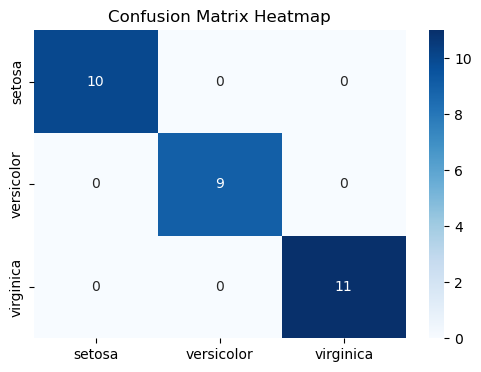

In [38]:
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix , annot = True , cmap = 'Blues' , xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix Heatmap")

In [43]:
sample_input = [[5.1, 4.5 , 6.4 ,1.2]]

In [44]:
predicted_class = model.predict(sample_input)[0]

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [45]:
iris.target_names[predicted_class]

'virginica'